In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [2]:
nmjPath = 'Desktop/Data_Adrienne/NMJ Figures/'
readPath = 'Desktop/Data_Adrienne/NMJ Data/'
kwargs = {'sep': '\t', 'header': None}

In [3]:
def adjustValues(df):
    #Creates column names
    df.columns = ['Time (ms)', 'Page', 'CAP (mV)', 'MAP (mV)']
    #Changes default seconds to milliseconds
    df['Time (ms)'] = df['Time (ms)'] * 1000
    #Adjusts for gain
    df['CAP (mV)'] = df['CAP (mV)'] * 10
    df['MAP (mV)'] = df['MAP (mV)'] * 10
    return df

def plotData(df, xmin=0, xmax=10, ymin=-10, ymax=10, toPlot='', title='', label1='', label2='', 
             file_name='', plotting='', dfCAP='', dfMAP='', save=False):
    
    plt.figure(figsize = (10,6))
    if toPlot=='CAP':
        for page, _df in df.groupby('Page'):
            plt.plot(_df['Time (ms)'], _df['CAP (mV)'], 'b-', linewidth=1)
    elif toPlot=='MAP':
        for page, _df in df.groupby('Page'):
            plt.plot(_df['Time (ms)'], _df['MAP (mV)'], 'r-', linewidth=1)
    elif toPlot=='twoCAPs':
        for page, _df in df.groupby('Page'):
            plt.plot(_df['Time (ms)'], _df['CAP (mV)'], 'b-', linewidth=1, label=label1)
        for page, _df in dfCAP.groupby('Page'):
            plt.plot(_df['Time (ms)'], _df['CAP (mV)'], oldCAP, linewidth=1, label=label2)
            plt.legend()
    else:
        if plotting=='differentPages':
            for page, _df in df.groupby('Page'):
                plt.plot(_df['Time (ms)'], _df['CAP (mV)'], 'b-', linewidth=1, label='CAP')
            for page, _df in dfMAP.groupby('Page'):
                plt.plot(_df['Time (ms)'], _df['MAP (mV)'], 'r-', linewidth=1, label='MAP')
                plt.legend()
        else:
            for page, _df in df.groupby('Page'):
                plt.plot(_df['Time (ms)'], _df['CAP (mV)'], 'b-', linewidth=1, label='CAP')
                plt.plot(_df['Time (ms)'], _df['MAP (mV)'], 'r-', linewidth=1, label='MAP')
                
    plt.xlim(xmin=xmin, xmax=xmax)
    plt.ylim(ymin=ymin, ymax=ymax)
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Preamplifier Output (mV)')
    if save:
        plt.savefig(nmjPath + file_name, dpi=1200)
    else:
        plt.show()
        
def plotSubplot(df, xmin=0, xmax=12, ymin1=-10, ymax1=15, ymin2=-60, ymax2=60, save=False, file_name='', title=''):
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    for page, _df in df.groupby('Page'):
        ax[0].plot(_df['Time (ms)'], _df['CAP (mV)'], 'b-')
        ax[1].plot(_df['Time (ms)'], _df['MAP (mV)'], 'r-')
    ax[1].set_xlabel('Time (ms)')
    ax[0].set_ylabel('Preamplifier Output (mV)')
    ax[1].set_ylabel('Preamplifier Output (mV)')
    ax[0].set_xlim(xmin=xmin, xmax=xmax)
    ax[0].set_ylim(ymin=ymin1, ymax=ymax1)
    ax[1].set_ylim(ymin=ymin2, ymax=ymax2)
    plt.suptitle(title)
    if save:
        plt.savefig(nmjPath + file_name, dpi=1200)
    else:
        plt.show()

In [4]:
x = 'Time (ms)'
y = 'CAP (mV)'
yy = 'MAP (mV)'
oldCAP = '#4d75b3'
oldMAP = '#b34d4d'

In [5]:
verify = pd.read_csv(readPath + 'NMJ Verify.txt', **kwargs)

In [6]:
adjustValues(verify)

,Time (ms),Page,CAP (mV),MAP (mV)
0,0.00,1,0.005,0.000
1,0.01,1,0.040,0.000
2,0.02,1,0.005,0.000
3,0.03,1,0.030,0.000
4,0.04,1,0.010,0.000
...,...,...,...,...
1275,12.75,1,0.085,-0.350
1276,12.76,1,0.065,-0.375
1277,12.77,1,0.080,-0.375
1278,12.78,1,0.070,-0.375


### Testing plotting functions

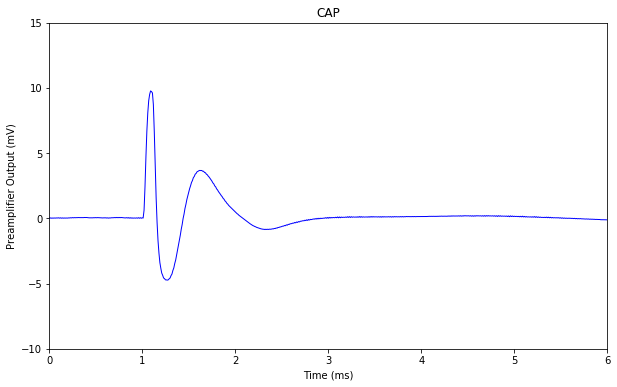

In [7]:
plotData(verify, toPlot='CAP', ymax=15, xmax=6, title='CAP')

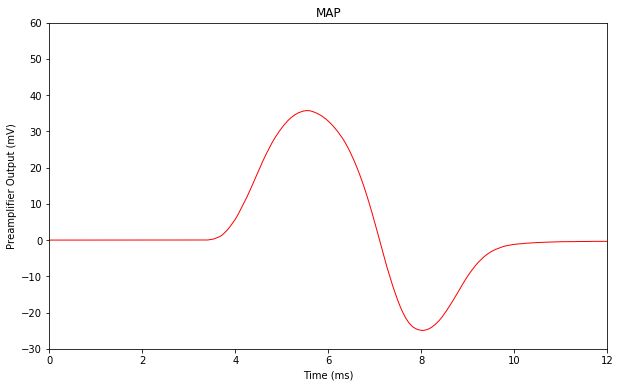

In [8]:
plotData(verify, toPlot='MAP', ymax=60, ymin=-30, xmax=12, title='MAP')

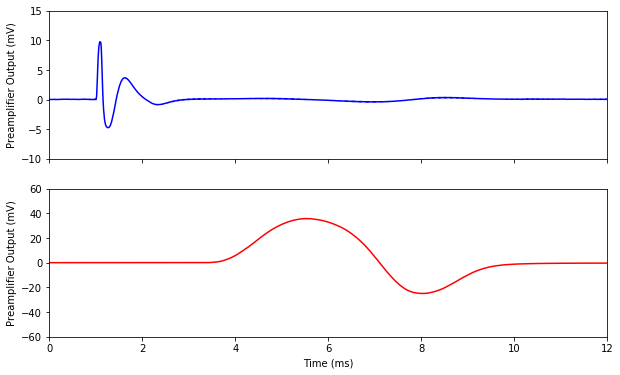

In [9]:
plotSubplot(verify, save=True, file_name='nmjVerification.jpg')

# Recruitment

In [10]:
recruitment = pd.read_csv(readPath + 'Recruitment_3.txt', **kwargs)

In [11]:
adjustValues(recruitment)

,Time (ms),Page,CAP (mV),MAP (mV)
0,0.00,1,-0.155,0.00
1,0.01,1,-0.185,0.00
2,0.02,1,-0.140,0.00
3,0.03,1,-0.200,0.00
4,0.04,1,-0.120,0.00
...,...,...,...,...
49915,12.75,39,-0.205,0.21
49916,12.76,39,-0.310,0.21
49917,12.77,39,-0.190,0.21
49918,12.78,39,-0.320,0.22


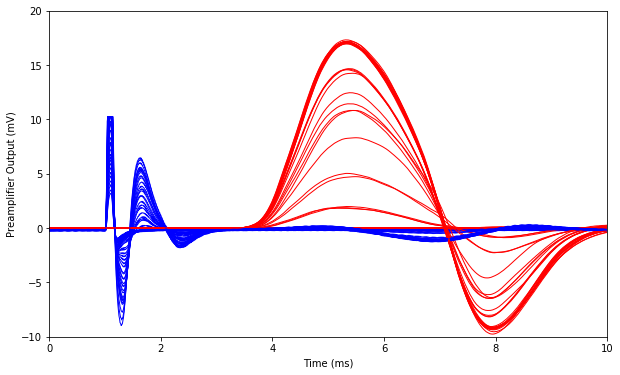

In [12]:
plotData(recruitment, ymax=20)

### Threshold

In [13]:
cap_lower = recruitment[recruitment['Page'] == 11]
cap_upper = recruitment[recruitment['Page'] == 15]
map_lower = recruitment[recruitment['Page'] == 10]
map_upper = recruitment[recruitment['Page'] == 11]

In [14]:
def adjustBaseline(df, toPlot=''):
    if toPlot=='CAP':
        df.loc[:, 'CAP (mV)'] = df.loc[:,'CAP (mV)'] - df['CAP (mV)'].values[0]
    if toPlot=='MAP':
        df.loc[:, 'MAP (mV)'] = df.loc[:,'MAP (mV)'] - df['MAP (mV)'].values[0]

adjustBaseline(cap_lower, toPlot='CAP')
adjustBaseline(cap_upper, toPlot='CAP')
adjustBaseline(map_lower, toPlot='MAP')
adjustBaseline(map_upper, toPlot='MAP')

/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


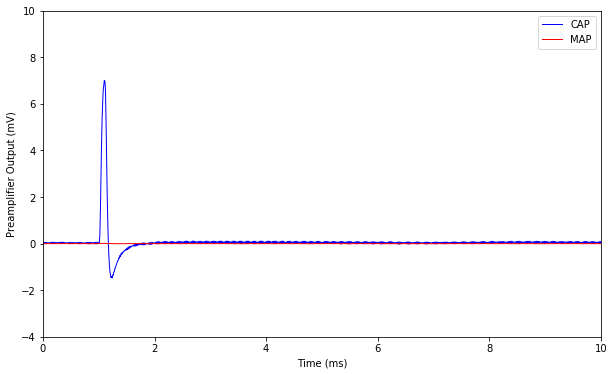

In [15]:
plotData(cap_lower, plotting='differentPages', dfMAP=map_lower, ymin=-4, save=True, file_name='nmjThresholdLower.jpg')

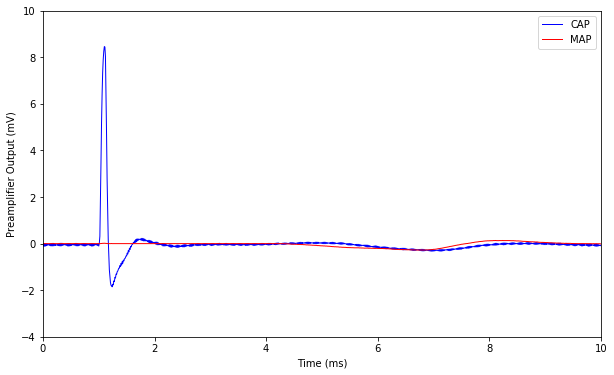

In [16]:
plotData(cap_upper, plotting='differentPages', dfMAP=map_upper, ymin=-4, save=True, file_name='nmjThresholdUpper.jpg')

### Choosing pages to show for recruitment

In [17]:
increase_1 = recruitment[recruitment['Page'] == 17]
increase_2 = recruitment[recruitment['Page'] == 21]
increase_3 = recruitment[recruitment['Page'] == 23]
increase_4 = recruitment[recruitment['Page'] == 27]
cap_at_maxmap_lower = recruitment[recruitment['Page'] == 32]
cap_at_maxmap_mid = recruitment[recruitment['Page'] == 35]
cap_at_maxmap_upper = recruitment[recruitment['Page'] == 39]

### Next I plotted four sets of data where increasing stimulus amplitudes led to increases in both CAP and MAP

No handles with labels found to put in legend.


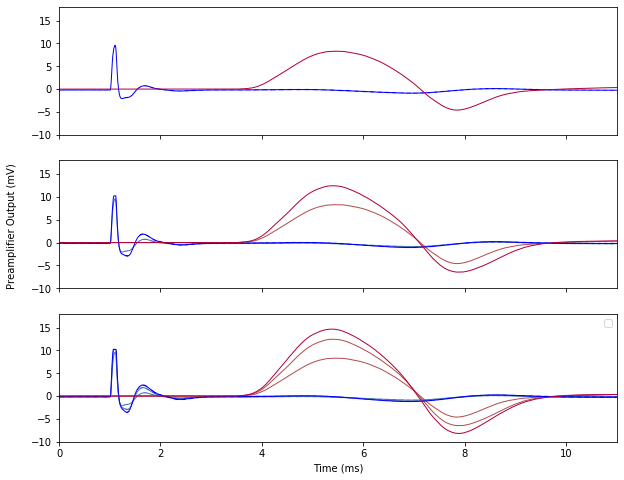

In [18]:
increases = [increase_1, increase_2, increase_3]
f, ax = plt.subplots(3,1, sharex = 'all', sharey = 'all', figsize = (10,8))
for i in range(len(ax)):
    _a = ax[i] # current axis we want to write
    _increases = increases[:i+1]
    for j in range(len(_increases)):
        _inc = increases[j]
        
        if len(_increases)==1 or j == len(_increases)-1:
            akwargs = {'color':'#0000FF', 'linewidth':1}
            bkwargs = {'color':'#b3003b', 'linewidth':1}
            
        else:
            akwargs = {'color':oldCAP, 'linewidth':1}
            bkwargs = {'color':oldMAP, 'linewidth':1}
            
        _a.plot(_inc[x], _inc[y], '-', **akwargs)
        _a.plot(_inc[x], _inc[yy], '-', **bkwargs)

plt.suptitle("")
plt.xlabel('Time (ms)')
f.text(0.06, 0.5, 'Preamplifier Output (mV)', va='center', ha='center', rotation='vertical')
plt.xlim(xmin = 0, xmax = 11)
plt.ylim(ymin = -10, ymax = 18)
plt.legend()
plt.savefig(nmjPath + 'nmjRecruitment.jpg', dpi=1200)

### And last are three pages of max MAP data with increasing CAPs

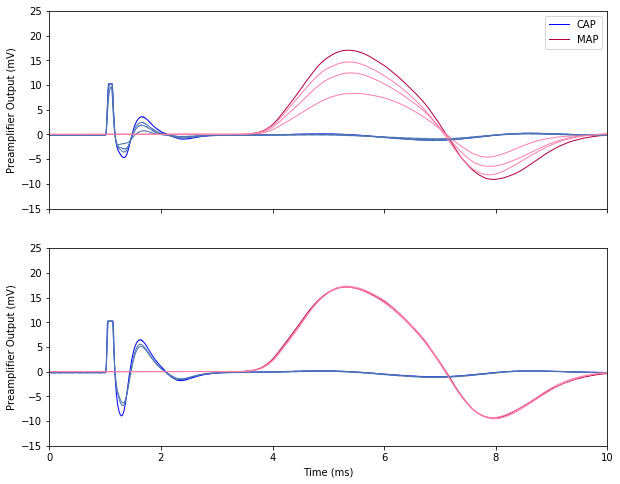

In [20]:
increases = [increase_1, increase_2,increase_3]
maxPages = [cap_at_maxmap_lower, cap_at_maxmap_mid]

fig, ax = plt.subplots(2,1, sharex = 'all', sharey = 'all', figsize = (10,8))
ax[0].plot(increase_4['Time (ms)'], increase_4['CAP (mV)'], 'b-', linewidth=1, label = 'CAP')
ax[0].plot(increase_4['Time (ms)'], increase_4['MAP (mV)'], '#b3003b', linewidth=1, label = 'MAP')
for page in increases:
    ax[0].plot(page['Time (ms)'], page['CAP (mV)'], '#4d75b3', linewidth=1)
    ax[0].plot(page['Time (ms)'], page['MAP (mV)'], '#ff80aa', linewidth=1)
ax[1].plot(cap_at_maxmap_upper['Time (ms)'], cap_at_maxmap_upper['CAP (mV)'], 'b-', linewidth=1)
ax[1].plot(cap_at_maxmap_upper['Time (ms)'], cap_at_maxmap_upper['MAP (mV)'], '#b3003b', linewidth=1)
for page in maxPages:
    ax[1].plot(page['Time (ms)'], page['CAP (mV)'], '#4d75b3', linewidth=1)
    ax[1].plot(page['Time (ms)'], page['MAP (mV)'], '#ff80aa', linewidth=1)
plt.suptitle("")
plt.xlabel('Time (ms)')
ax[0].set_ylabel('Preamplifier Output (mV)')
ax[1].set_ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 10)
plt.ylim(ymin = -15, ymax = 25)
ax[0].legend()
plt.savefig(nmjPath + 'nmjMaxMAP.jpg', dpi=1200)

# Synaptic Delay

### Homework begin

In [21]:
delayHW = pd.read_csv('Desktop/Data_Adrienne/Homework Data/NMJ/Conduction time and synaptic delay.txt', sep= '\t', header=None)

adjustValues(delayHW)

,Time (ms),Page,CAP (mV),MAP (mV)
0,0.00,1,0.035,0.000
1,0.01,1,-0.010,0.000
2,0.02,1,0.040,0.000
3,0.03,1,-0.010,0.000
4,0.04,1,0.040,0.000
...,...,...,...,...
3835,12.75,3,0.140,-0.475
3836,12.76,3,0.145,-0.475
3837,12.77,3,0.140,-0.475
3838,12.78,3,0.145,-0.475


In [22]:
test = delayHW[(delayHW['Page'] == 1) | (delayHW['Page'] == 2)]

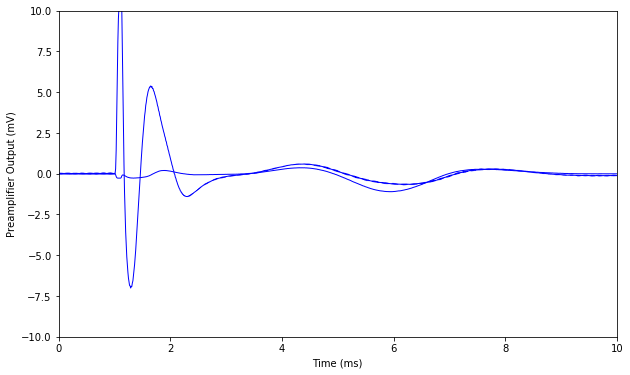

In [23]:
plotData(test, toPlot='CAP')

In [24]:
#Finding CAP amplitude from recording electrode E
delayHW[delayHW['Time (ms)'].isin([1.75, 2.25])]

,Time (ms),Page,CAP (mV),MAP (mV)
175,1.75,1,4.495,0.175
225,2.25,1,-1.330,0.100
1455,1.75,2,0.090,0.175
1505,2.25,2,-0.005,0.100
2735,1.75,3,0.175,0.025
2785,2.25,3,-0.005,0.025


In [25]:
delayHW.iloc[1455:1505]['CAP (mV)'].max()

0.2

In [26]:
delayHW[delayHW['CAP (mV)'] == 0.2]
# I'm going to go with 1.88 ms

,Time (ms),Page,CAP (mV),MAP (mV)
369,3.69,1,0.2,1.900
820,8.20,1,0.2,-14.825
1468,1.88,2,0.2,0.125
1469,1.89,2,0.2,0.125
1471,1.91,2,0.2,0.125
1665,3.85,2,0.2,3.250
1753,4.73,2,0.2,14.400
1754,4.74,2,0.2,14.550
2005,7.25,2,0.2,-13.750
2090,8.10,2,0.2,-15.525


In [27]:
#Finding CAP amplitude from recording electrode D
re_d = test[test['Time (ms)'] > 1.5]
re_d[re_d['Page'] ==1]['CAP (mV)'].max()

5.385

In [28]:
re_d[re_d['CAP (mV)'] == re_d[re_d['Page'] ==1]['CAP (mV)'].max()]

,Time (ms),Page,CAP (mV),MAP (mV)
165,1.65,1,5.385,0.225


In [29]:
print('The conduction velocity is %.2f (m/s)' % (10/(1.88-1.65)))

The conduction velocity is 43.48 (m/s)


### Homework end

In [30]:
synaptic_delay = pd.read_csv('Desktop/Data_Adrienne/NMJ Data/Synaptic Delay.txt', **kwargs)
adjustValues(synaptic_delay)

,Time (ms),Page,CAP (mV),MAP (mV)
0,0.00,1,0.545,-0.11
1,0.01,1,0.500,-0.11
2,0.02,1,0.565,-0.11
3,0.03,1,0.490,-0.11
4,0.04,1,0.575,-0.11
...,...,...,...,...
2555,12.75,2,-0.135,0.49
2556,12.76,2,-0.070,0.49
2557,12.77,2,-0.140,0.49
2558,12.78,2,-0.075,0.49


In [31]:
re_d = synaptic_delay[synaptic_delay['Page'] ==1]
re_e = synaptic_delay[synaptic_delay['Page'] ==2]

In [32]:
adjustBaseline(re_d, toPlot='CAP')

adjustBaseline(re_e, toPlot='CAP')

In [33]:
plotData(re_d, dfCAP=re_e, toPlot='twoCAPs', label1='Recording electrode at D', label2='Recording electrode at E',
         xmax=3, ymax=15, save=True, file_name='nmj_condVel.jpg', dpi=1200)

TypeError: plotData() got an unexpected keyword argument 'dpi'

### Finding CAP and MAP Latencies

In [34]:
re_dAdjusted = re_d[re_d['Time (ms)'] >= 1.5]
re_eAdjusted = re_e[re_e['Time (ms)'] >= 1.5]

maxD = re_dAdjusted['CAP (mV)'].max()

maxE = re_eAdjusted['CAP (mV)'].max()

In [35]:
#Find CAP latency at electrode D
re_dAdjusted[re_dAdjusted['CAP (mV)'] == maxD]['Time (ms)']

169    1.69
Name: Time (ms), dtype: float64

In [36]:
#Find CAP latency at electrode E
re_eAdjusted[re_eAdjusted['CAP (mV)'] == maxE]

,Time (ms),Page,CAP (mV),MAP (mV)
1463,1.83,2,2.495,-0.11


In [37]:
#Find MAP latency
re_d[re_d['MAP (mV)'] >= 0].head(3)

,Time (ms),Page,CAP (mV),MAP (mV)
365,3.65,1,-0.115,0.00
366,3.66,1,-0.100,0.00
367,3.67,1,-0.085,0.01


### Raw data for the same as above, but with MAP data

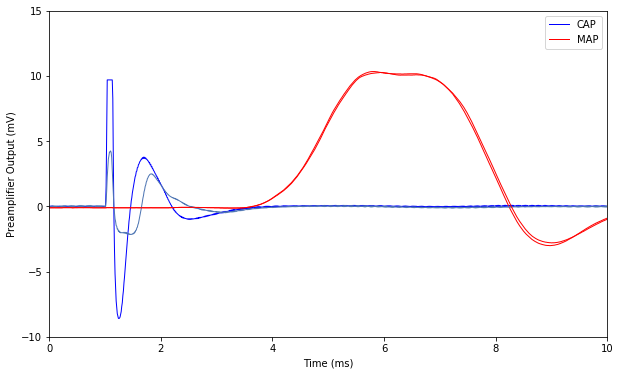

In [38]:
plt.figure(figsize = (10,6))
plt.plot(re_d['Time (ms)'], re_d['CAP (mV)'], 'b-', linewidth=1, label='CAP')
plt.plot(re_d['Time (ms)'], re_d['MAP (mV)'], 'r-', linewidth=1, label='MAP')
plt.plot(re_e['Time (ms)'], re_e['CAP (mV)'], oldCAP, linewidth=1)
plt.plot(re_e['Time (ms)'], re_e['MAP (mV)'], 'r-', linewidth=1)
plt.title("")
plt.xlabel('Time (ms)')
plt.ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 10)
plt.ylim(ymin = -10, ymax = 15)
plt.legend()
plt.savefig('nmj_synDelay.jpg', format='jpg', dpi=1200)

# Facilitation

In [39]:
facilitation = pd.read_csv(readPath + 'Facilitation_1.txt', **kwargs)

In [40]:
adjustValues(facilitation)

,Time (ms),Page,CAP (mV),MAP (mV)
0,0.00,1,0.175,-1.4
1,0.05,1,0.175,-1.4
2,0.10,1,0.175,-1.4
3,0.15,1,0.200,-1.4
4,0.20,1,0.175,-1.4
...,...,...,...,...
15355,25.55,6,0.100,-1.3
15356,25.56,6,0.125,-1.3
15357,25.57,6,0.100,-1.3
15358,25.58,6,0.100,-1.3


In [41]:
twenty = facilitation[facilitation['Page'] == 1]
five = facilitation[facilitation['Page'] == 5]
two = facilitation[facilitation['Page'] == 6]

### Stimulating at an interval of 20 ms

In [42]:
adjustBaseline(twenty, toPlot='MAP')

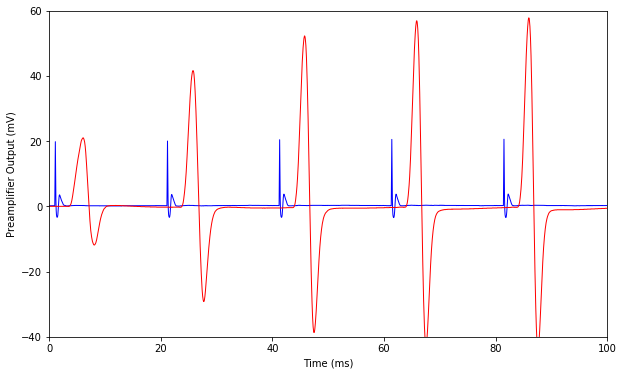

In [43]:
plotData(twenty, xmax=100, ymax=60, ymin=-40, save=True, file_name='nmj20.jpg')

In [44]:
adjustBaseline(five, toPlot='MAP')

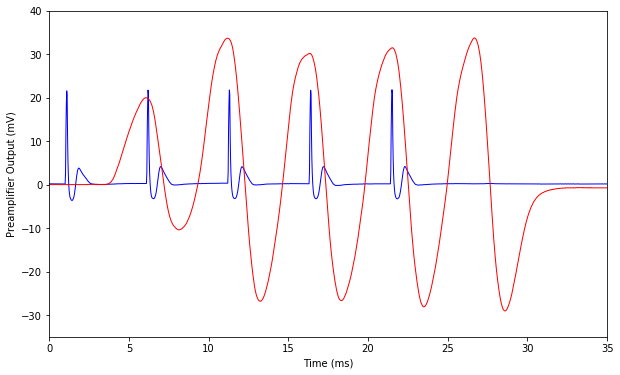

In [45]:
plotData(five, xmax=35, ymax=40, ymin=-35)

In [46]:
adjustBaseline(two, toPlot='MAP')

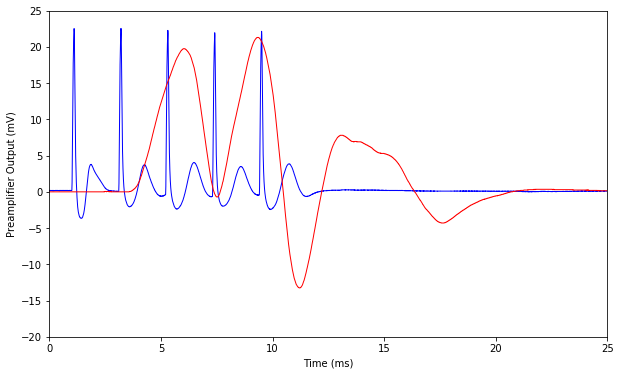

In [47]:
plotData(two, xmax=25, ymax=25, ymin=-20, save=True, file_name='nmj2.jpg')

# Recovery

In [48]:
recovery = pd.read_csv(readPath + 'Recovery.txt', **kwargs)
recovery.dropna(how='any', axis=1, inplace=True)
recovery.head()
recovery.columns = ['Time (ms)', 'CAP (mV)', 'MAP (mV)']

In [49]:
recovery[recovery['Time (ms)'] == 0]

,Time (ms),CAP (mV),MAP (mV)
0,0.0,0.015,-0.625
1280,0.0,-0.020,0.000
2560,0.0,-0.005,0.000
3840,0.0,-0.015,0.000
5120,0.0,0.010,0.000
6400,0.0,-0.010,0.000


In [50]:
control = recovery.iloc[0:1280]
min_1 = recovery.iloc[1280:2560]
min_2 = recovery.iloc[2560:3840]
min_3 = recovery.iloc[3840:5120]
min_4 = recovery.iloc[5120:6400]
min_5 = recovery.iloc[6400:]

### Five pages of CAP recovery data

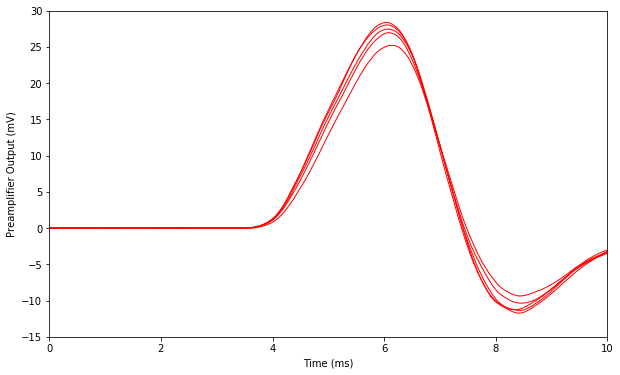

In [51]:
pages = [min_1, min_2, min_3, min_4, min_5]
plt.figure(figsize=(10,6))
for page in pages:
    plt.plot(page['Time (ms)'], page['MAP (mV)'], 'r-', linewidth=1)
plt.xlabel('Time (ms)')
plt.ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 10)
plt.ylim(ymin = -15, ymax = 30) 
plt.show()

### Five pages of MAP recovery data

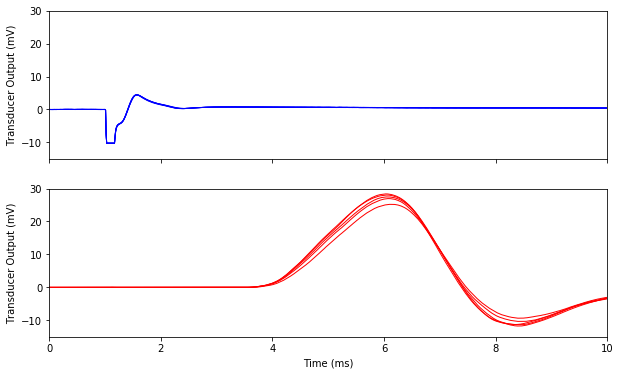

In [52]:
pages = [min_1, min_2, min_3, min_4, min_5]
fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True, sharey=True)
for page in pages:
    ax[0].plot(page['Time (ms)'], page['CAP (mV)'], 'b-', linewidth=1)
    ax[1].plot(page['Time (ms)'], page['MAP (mV)'], 'r-', linewidth=1)
plt.xlabel('Time (ms)')
ax[0].set_ylabel('Transducer Output (mV)')
ax[1].set_ylabel('Transducer Output (mV)')
plt.xlim(xmin = 0, xmax = 10)
plt.ylim(ymin = -15, ymax = 30) 
plt.show()

### Creating my own control

In [53]:
fakeControl = recovery.iloc[0:1280]

In [54]:
fakeControl['Adjusted Time (ms)'] = fakeControl['Time (ms)'] - 0.5
fakeControl['Adjusted MAP (mV)'] = fakeControl['MAP (mV)']
fakeControl.reset_index(drop=True, inplace=True)

/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Magic `+=`

i=i+1 === i+=1

In [55]:
idx = fakeControl[fakeControl['Adjusted MAP (mV)'] >= 0].index

In [56]:
fakeControl['Adjusted MAP (mV)'].iloc[idx]*=2

/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
fakeControl[['Adjusted MAP (mV)']].iloc[411:] = fakeControl[['Adjusted MAP (mV)']].iloc[411:] + 20

/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/adrienneterrado/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


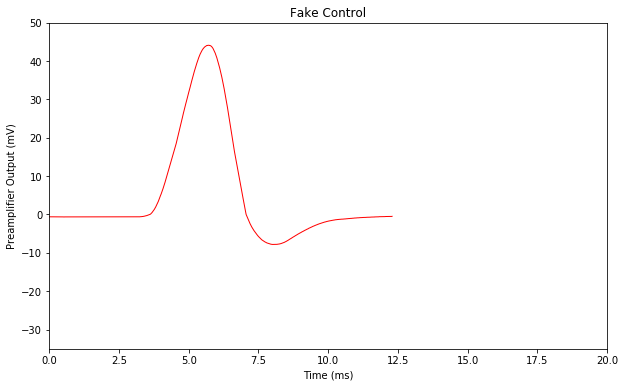

In [58]:
plt.figure(figsize = (10,6))
plt.plot(fakeControl['Adjusted Time (ms)'], fakeControl['Adjusted MAP (mV)'], 'r-', linewidth=1)
plt.title("Fake Control")
plt.xlabel('Time (ms)')
plt.ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 20)
plt.ylim(ymin = -35, ymax = 50)
plt.show()

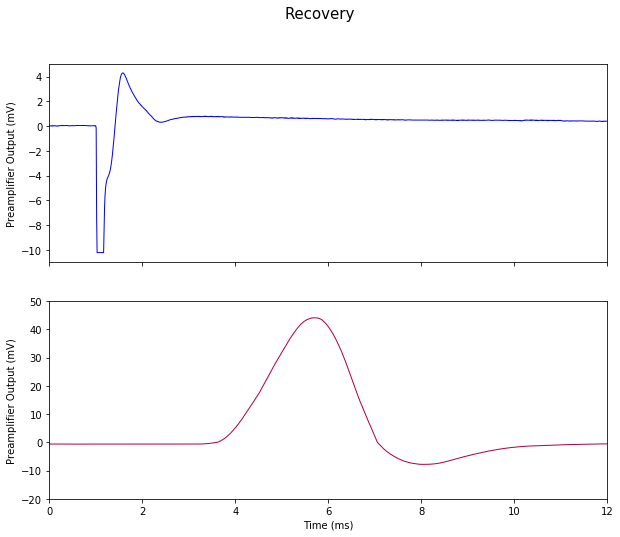

In [59]:
f, (cap, map_data) = plt.subplots(2,1, sharex = 'all', figsize = (10,8))
cap.plot(control['Time (ms)'], control['CAP (mV)'], 'b-', linewidth=1)
plt.plot(fakeControl['Adjusted Time (ms)'], fakeControl['Adjusted MAP (mV)'], '#b3003b', linewidth=1)
f.suptitle('Recovery', fontsize = 15)
plt.xlabel('Time (ms)')
cap.set_ylabel('Preamplifier Output (mV)')
map_data.set_ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 12)
plt.ylim(ymin = -20, ymax = 50)
plt.savefig(nmjPath + 'nmjRecoveryControl.jpg', dpi=1200)

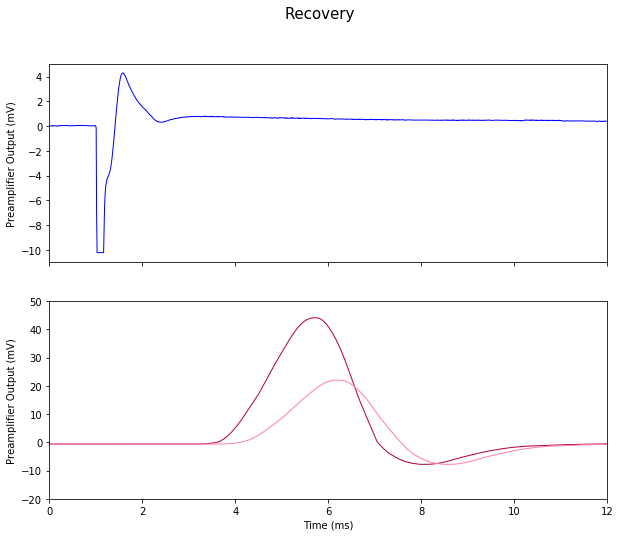

In [60]:
f, (cap, map_data) = plt.subplots(2,1, sharex = 'all', figsize = (10,8))
cap.plot(control['Time (ms)'], control['CAP (mV)'], 'b-', linewidth=1)
plt.plot(fakeControl['Adjusted Time (ms)'], fakeControl['Adjusted MAP (mV)'], '#b3003b', linewidth=1)
map_data.plot(control['Time (ms)'], control['MAP (mV)'], '#ff80aa', linewidth=1)
f.suptitle('Recovery', fontsize = 15)
plt.xlabel('Time (ms)')
cap.set_ylabel('Preamplifier Output (mV)')
map_data.set_ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 12)
plt.ylim(ymin = -20, ymax = 50)
plt.savefig(nmjPath + 'nmjRecovery1.jpg', dpi=1200)

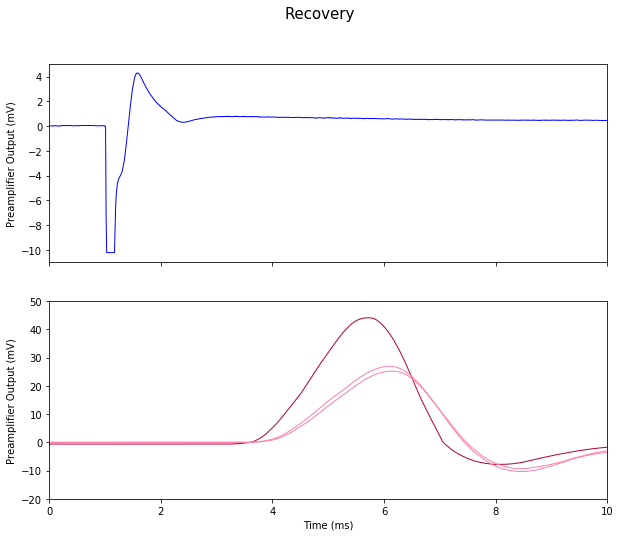

In [61]:
f, ax = plt.subplots(2,1, sharex = 'all', figsize = (10,8))
ax[0].plot(control['Time (ms)'], control['CAP (mV)'], 'b-', linewidth=1)
ax[1].plot(fakeControl['Adjusted Time (ms)'], fakeControl['Adjusted MAP (mV)'], '#b3003b', linewidth=1)
i=0
for page in pages:
    ax[1].plot(page['Time (ms)'], page['MAP (mV)'], '#ff80aa', linewidth=1)
    i = i+1
    if i >= 2:
        break
    
f.suptitle('Recovery', fontsize = 15)
plt.xlabel('Time (ms)')
ax[0].set_ylabel('Preamplifier Output (mV)')
ax[1].set_ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 10)
plt.ylim(ymin = -20, ymax = 50)
plt.savefig(nmjPath + 'nmjRecovery2.jpg', dpi=1200)

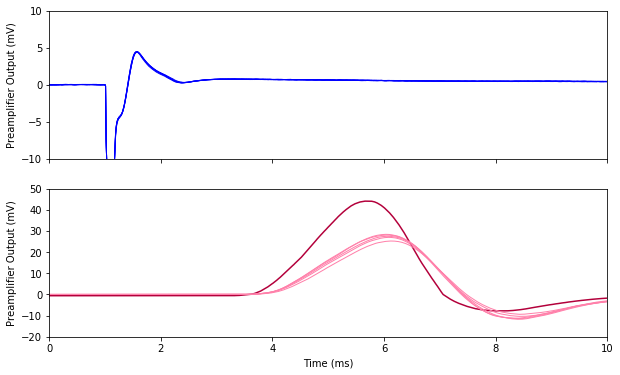

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(10,6), sharex=True)
ax[1].plot(fakeControl['Adjusted Time (ms)'], fakeControl['Adjusted MAP (mV)'], '#b3003b')
for page in pages:
    ax[0].plot(page['Time (ms)'], page['CAP (mV)'], 'b-', linewidth=1)
    ax[1].plot(page['Time (ms)'], page['MAP (mV)'], '#ff80aa', linewidth=1)
plt.xlabel('Time (ms)')
ax[0].set_ylabel('Preamplifier Output (mV)')
ax[1].set_ylabel('Preamplifier Output (mV)')
plt.xlim(xmin = 0, xmax = 10)
ax[0].set_ylim(ymin = -10, ymax = 10) 
ax[1].set_ylim(ymin = -20, ymax = 50) 
plt.savefig(nmjPath + 'nmjRecovery3.jpg', dpi=1200)